In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os
from env import get_connection


from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import acquire
import prepare

#### Using the titanic data, in your classification-exercises repository, create a notebook, decision_tree.ipynb where you will do the following:

1. What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.

2. Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

3. Evaluate your in-sample results using the model score, confusion matrix, and classification report.

4. Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

5. Run through steps 2-4 using a different max_depth value.

6. Which model performs better on your in-sample data?

7. Which model performs best on your out-of-sample data, the validate set?

In [40]:
# acquire data
titanic_original = acquire.get_titanic_data()
titanic_original.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [41]:
# clean data
titanic_clean = prepare.prep_titanic(titanic_original)
titanic_clean.head()

,survived,pclass,sex,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,3,male,1,0,7.2500,Southampton,0,1,0,1
1,1,1,female,1,0,71.2833,Cherbourg,0,0,0,0
2,1,3,female,0,0,7.9250,Southampton,1,0,0,1
3,1,1,female,1,0,53.1000,Southampton,0,0,0,1
4,0,3,male,0,0,8.0500,Southampton,1,1,0,1


In [42]:
# furhter cleaning, drop columns with repeatated information and has data types string
titanic_clean.drop(columns=['sex', 'embark_town'],inplace=True)

In [43]:
titanic_clean.head()

,survived,pclass,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,3,1,0,7.2500,0,1,0,1
1,1,1,1,0,71.2833,0,0,0,0
2,1,3,0,0,7.9250,1,0,0,1
3,1,1,1,0,53.1000,0,0,0,1
4,0,3,0,0,8.0500,1,1,0,1


In [46]:
#check to see if columns data types are float or int
titanic_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   survived                 891 non-null    int64  
 1   pclass                   891 non-null    int64  
 2   sibsp                    891 non-null    int64  
 3   parch                    891 non-null    int64  
 4   fare                     891 non-null    float64
 5   alone                    891 non-null    int64  
 6   sex_male                 891 non-null    uint8  
 7   embark_town_Queenstown   891 non-null    uint8  
 8   embark_town_Southampton  891 non-null    uint8  
dtypes: float64(1), int64(5), uint8(3)
memory usage: 44.5 KB


In [6]:
# Create function to split data
def train_val_test(df, target, seed=42):
    
    train, val_test = train_test_split(df, train_size=0.7, random_state=seed, stratify=df[target])
    
    val, test = train_test_split(val_test, train_size=0.5, random_state=seed, stratify=val_test[target])
    
    return train, val, test

In [47]:
# split data into train, val and test using train_val_test function
train,val,test = train_val_test(titanic_clean, 'survived')
train.shape, val.shape, test.shape

((623, 9), (134, 9), (134, 9))

In [48]:
# create labels 
X_train = train.drop(columns = ['survived'])
y_train = train['survived']

X_val =val.drop(columns = ['survived'])
y_val = val['survived']

X_test = test.drop(columns = ['survived'])
y_test = test['survived']

In [13]:
# to find baseling, find most common classes
y_train.value_counts()

0    384
1    239
Name: survived, dtype: int64

In [14]:
# assign most common class to baseline prediction
baseline_prediction = 0

In [15]:
# compare baseline with y_train class to get most common class and get mean
baseline_accuracy = (y_train==baseline_prediction).mean()
baseline_accuracy

0.6163723916532905

In [16]:
# alternate way to get baseline accuracy
baseline_prediction = y_train.mode()
match_baseline = (y_train==0)
baseline_accuracy = match_baseline.mean()
baseline_accuracy

0.6163723916532905

In [17]:
# create decision tree
seed = 42

clf = DecisionTreeClassifier(max_depth=3, random_state= 42)

In [18]:
# fit the model to training data
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [19]:
# accuracy score on train
clf.score(X_train, y_train)

0.812199036918138

In [20]:
# class_names = np.array(clf.classes_).astype('str').tolist()

[Text(0.5, 0.875, 'sex_male <= 0.5\ngini = 0.473\nsamples = 623\nvalue = [384, 239]\nclass = 0'),
 Text(0.25, 0.625, 'pclass <= 2.5\ngini = 0.374\nsamples = 217\nvalue = [54, 163]\nclass = 1'),
 Text(0.125, 0.375, 'fare <= 28.856\ngini = 0.112\nsamples = 117\nvalue = [7, 110]\nclass = 1'),
 Text(0.0625, 0.125, 'gini = 0.223\nsamples = 47\nvalue = [6, 41]\nclass = 1'),
 Text(0.1875, 0.125, 'gini = 0.028\nsamples = 70\nvalue = [1, 69]\nclass = 1'),
 Text(0.375, 0.375, 'fare <= 7.888\ngini = 0.498\nsamples = 100\nvalue = [47, 53]\nclass = 1'),
 Text(0.3125, 0.125, 'gini = 0.334\nsamples = 33\nvalue = [7, 26]\nclass = 1'),
 Text(0.4375, 0.125, 'gini = 0.481\nsamples = 67\nvalue = [40, 27]\nclass = 0'),
 Text(0.75, 0.625, 'fare <= 26.269\ngini = 0.304\nsamples = 406\nvalue = [330, 76]\nclass = 0'),
 Text(0.625, 0.375, 'parch <= 0.5\ngini = 0.226\nsamples = 300\nvalue = [261, 39]\nclass = 0'),
 Text(0.5625, 0.125, 'gini = 0.187\nsamples = 277\nvalue = [248, 29]\nclass = 0'),
 Text(0.6875, 0.

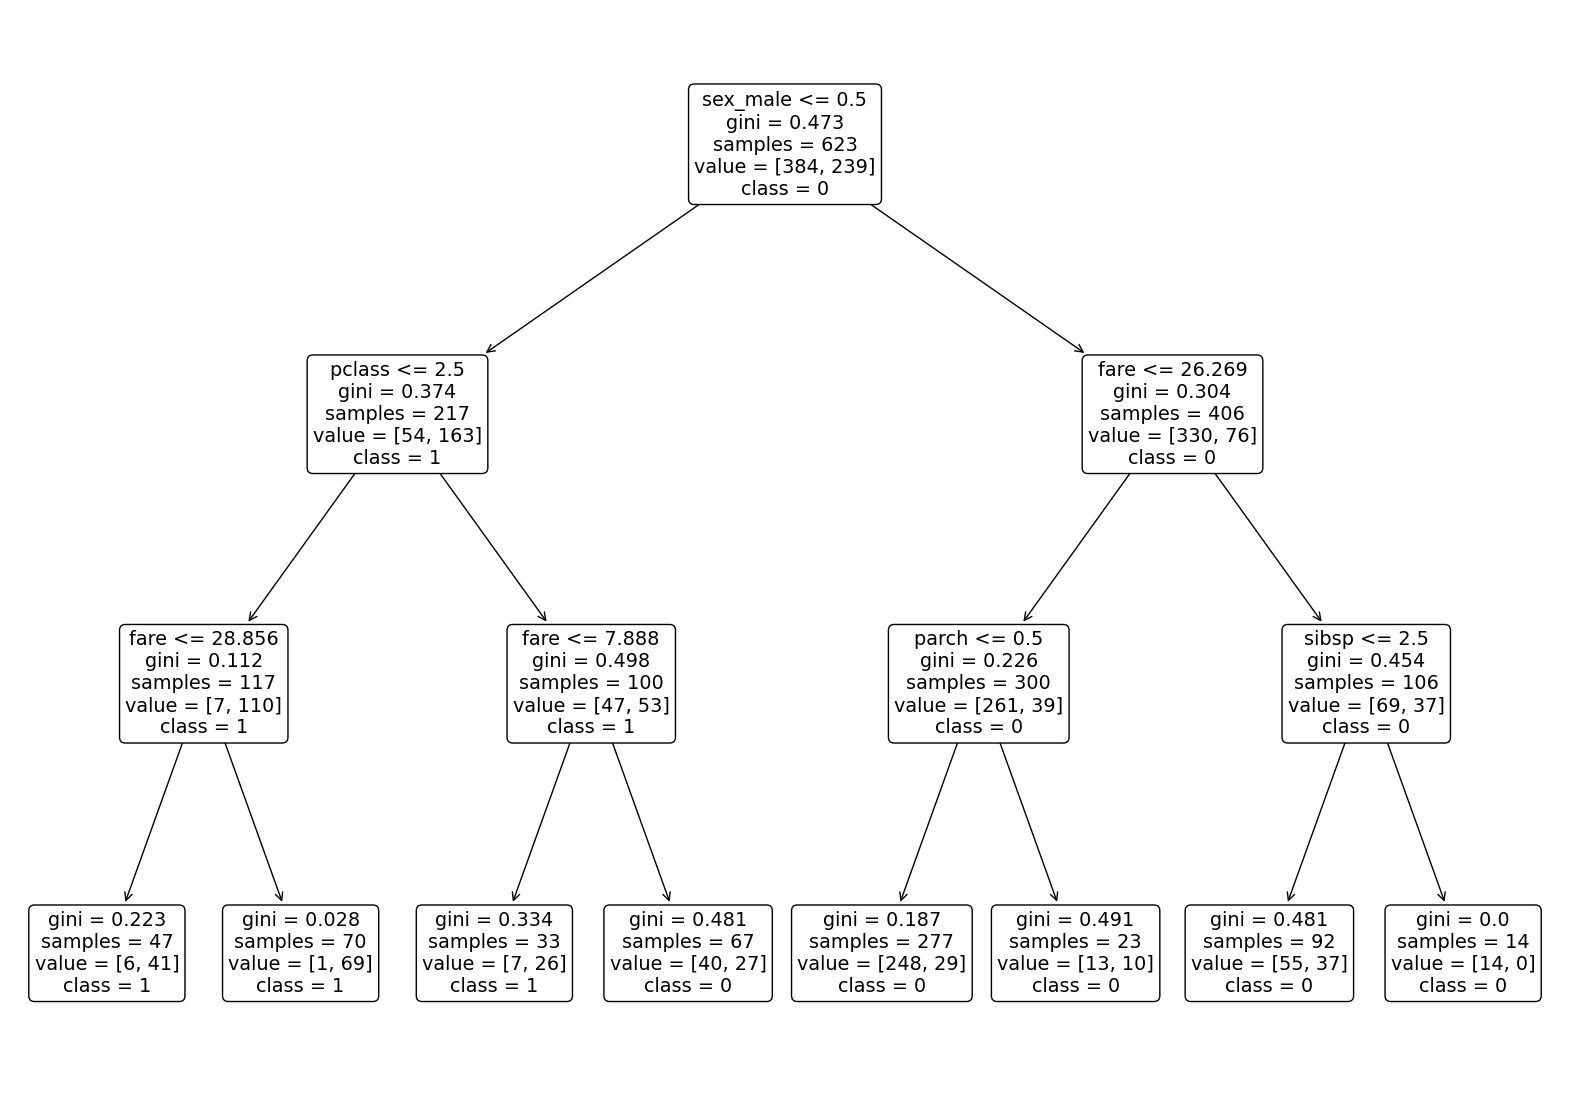

In [21]:
# visualize a decision tree
plt.figure(figsize=(20,14))

plot_tree(clf, feature_names = X_train.columns, class_names = np.array(clf.classes_).astype('str').tolist(), rounded=True)

In [23]:
# make prediction on train observations
val_preds = clf.predict(X_val)
val_preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1])

In [24]:
# confusion matrix
confusion_matrix(y_val ,val_preds)

array([[80,  2],
       [21, 31]])

In [26]:
# accuracy score on val
accuracy_score(y_val ,val_preds)

0.8283582089552238

In [28]:
# number of total accuracy on val
accuracy_score(y_val ,val_preds, normalize=False)

111

In [27]:
# classification report on val
print(classification_report(y_val, val_preds))

              precision    recall  f1-score   support

           0       0.79      0.98      0.87        82
           1       0.94      0.60      0.73        52

    accuracy                           0.83       134
   macro avg       0.87      0.79      0.80       134
weighted avg       0.85      0.83      0.82       134



In [29]:
# create decision tree with max_depth=4
seed = 42

clf2 = DecisionTreeClassifier(max_depth=4, random_state= 42)

In [30]:
# fit the model to training data
clf2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [31]:
# accuracy score on train
clf2.score(X_train, y_train)

0.8250401284109149

[Text(0.5, 0.875, 'sex_male <= 0.5\ngini = 0.473\nsamples = 623\nvalue = [384, 239]\nclass = 0'),
 Text(0.25, 0.625, 'pclass <= 2.5\ngini = 0.374\nsamples = 217\nvalue = [54, 163]\nclass = 1'),
 Text(0.125, 0.375, 'fare <= 28.856\ngini = 0.112\nsamples = 117\nvalue = [7, 110]\nclass = 1'),
 Text(0.0625, 0.125, 'gini = 0.223\nsamples = 47\nvalue = [6, 41]\nclass = 1'),
 Text(0.1875, 0.125, 'gini = 0.028\nsamples = 70\nvalue = [1, 69]\nclass = 1'),
 Text(0.375, 0.375, 'fare <= 7.888\ngini = 0.498\nsamples = 100\nvalue = [47, 53]\nclass = 1'),
 Text(0.3125, 0.125, 'gini = 0.334\nsamples = 33\nvalue = [7, 26]\nclass = 1'),
 Text(0.4375, 0.125, 'gini = 0.481\nsamples = 67\nvalue = [40, 27]\nclass = 0'),
 Text(0.75, 0.625, 'fare <= 26.269\ngini = 0.304\nsamples = 406\nvalue = [330, 76]\nclass = 0'),
 Text(0.625, 0.375, 'parch <= 0.5\ngini = 0.226\nsamples = 300\nvalue = [261, 39]\nclass = 0'),
 Text(0.5625, 0.125, 'gini = 0.187\nsamples = 277\nvalue = [248, 29]\nclass = 0'),
 Text(0.6875, 0.

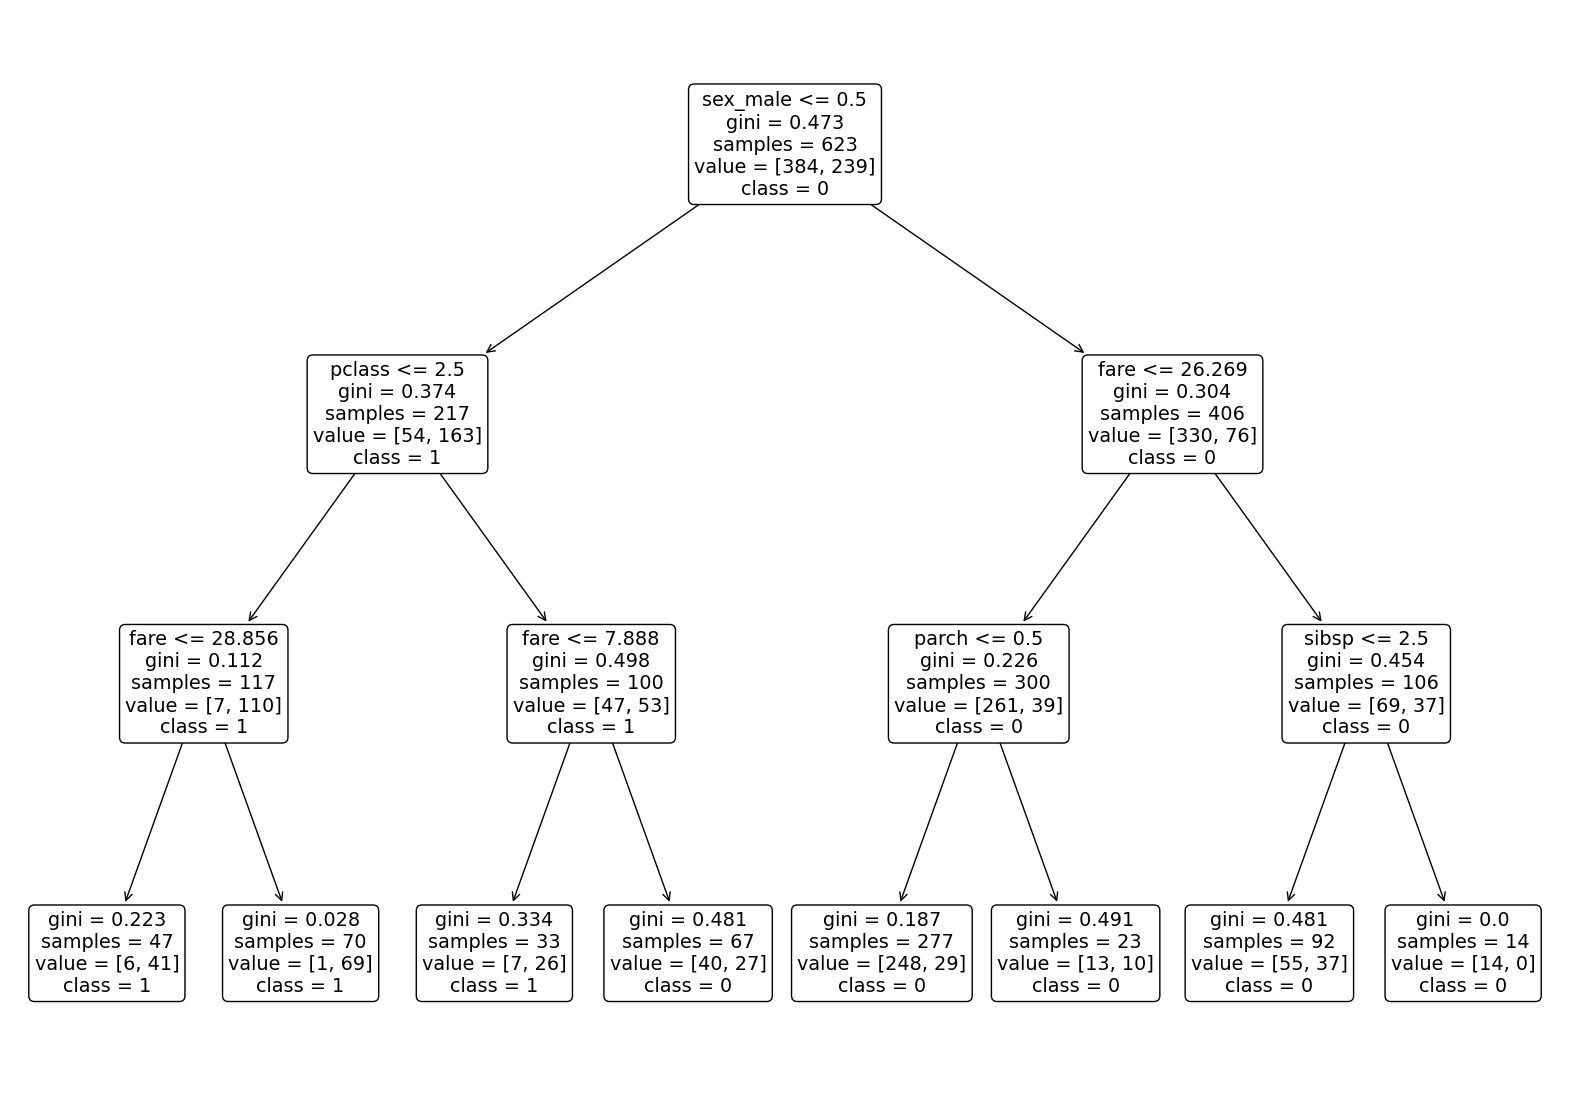

In [32]:
# visualize a decision tree
plt.figure(figsize=(20,14))

plot_tree(clf, feature_names = X_train.columns, class_names = np.array(clf.classes_).astype('str').tolist(), rounded=True)

In [33]:
# make prediction on train observations
val_preds_2 = clf2.predict(X_val)

In [35]:
# accuracy score on val of model 2
accuracy_score(y_val ,val_preds_2)

0.8134328358208955

In [34]:
# accuracy score on val of model 1
accuracy_score(y_val ,val_preds)

0.8283582089552238

In [51]:
# accuracy score on train of model2
clf2.score(X_train, y_train)

0.8250401284109149

In [52]:
# accuracy score on train of model1
clf.score(X_train, y_train)

0.812199036918138

Model1 perform better in-simple data

In [54]:
# confusion matrix of model2
confusion_matrix(y_val ,val_preds_2)

array([[76,  6],
       [19, 33]])

In [53]:
# confusion matrix of model1
confusion_matrix(y_val ,val_preds)

array([[80,  2],
       [21, 31]])

In [55]:
# classificatio report of model 2
print(classification_report(y_val, val_preds_2))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86        82
           1       0.85      0.63      0.73        52

    accuracy                           0.81       134
   macro avg       0.82      0.78      0.79       134
weighted avg       0.82      0.81      0.81       134



In [56]:
# classificatio report of model 1
print(classification_report(y_val, val_preds))

              precision    recall  f1-score   support

           0       0.79      0.98      0.87        82
           1       0.94      0.60      0.73        52

    accuracy                           0.83       134
   macro avg       0.87      0.79      0.80       134
weighted avg       0.85      0.83      0.82       134

